In [6]:
%load_ext autoreload
%autoreload 2

In [7]:
import sys
from pathlib import Path

# in jupyter (lab / notebook), based on notebook path
module_path = str(Path.cwd().parents[0] / "src")
# in standard python

if module_path not in sys.path:
    sys.path.append(module_path)

In [8]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [9]:
import data_processing as dp
import raw_query

In [10]:
# pip install sklearn
connector = dp.establish_connection()

Initiating login request with your identity provider. A browser window should have opened for you to complete the login. If you can't see it, check existing browser windows, or your OS settings. Press CTRL+C to abort and try again...
Going to open: https://newrelic.okta.com/app/snowflake/exkugjs4xeGHw0Vo10x7/sso/saml?SAMLRequest=lVJdj9owEPwrkfuc2CFw5SzCiUL5kI4WQbhWffMlC7gkdup1LuHf1%2BGjula6k%2FpmrWd2Znd28NAUufcCBqVWMQkDRjxQqc6k2sdkm0z9PvHQCpWJXCuIyQmQPAwHKIq85KPKHtQaflWA1nONFPL2IyaVUVwLlMiVKAC5TflmtHzknYBxgQjGOjlypWQondbB2pJTWtd1UEeBNnvaYYxRdk8dqoV8IK8kyvc1SqOtTnV%2BozRupjckQsq6rYRDOIXVlfhJqssK3lN5voCQz5Nk5a%2B%2BbhLijW7TjbXCqgCzAfMiU9iuHy8G0DlQUBvIZeos%2BJmwQmOASte7XBwh1UVZWdc2cC%2B6g4zmei%2FdshaTmJRHmX0rPjfpYjaPtv319wkue3bKml12dzdKD6VJlqfxtjdbiuh52k2J93SLttNGu0CsYKHaQK0rsU7PZz0%2F7CWsz6OIR%2FdBGPV%2FEG%2FiApVK2DPzX9eBPlpxdifKkv4xTqE5Vvuf2G1gNq%2FZkw5Z85EiatoGRi43w88OzPC%2FNzGgr%2BnX%2B%2FviIllMVto1OHlTbQph304sDMJzRWb%2B7gzlUAiZj7LMAKJLLs91PTYgrDtzayogdHhR%2FfvQh78B&RelayState=ver%3A1

In [11]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

In [160]:
# Pull data from Snowflake using raw_query
query = raw_query.query()
df = dp.fetch_data(query, connector)

In [161]:
df.head()

,SUBSCRIPTION_ACCOUNT_ID,EFFECTIVE_SUBSCRIPTION_ACCOUNT_ID,SFDC_ACCOUNT_ID,SFDC_ACCOUNT_NAME,REPORT_AS_OF_DT,REPORT_MONTH,BUYING_PROGRAM,LATEST_BUYING_PROGRAM,EFFECTIVE_ACR,IS_CONTRACT_FLAG,LATEST_EFFECTIVE_ACR,BCM,LATEST_BCM,SUBSCRIPTION_TERM_START_DATE,SUBSCRIPTION_TERM_END_DATE,RENEWAL_DATE,MULTIYEAR_FLAG,TOTAL_ACR,INDUSTRY,PHYSICAL_COUNTRY,EMPLOYEES,CONTRACT_START_DATE,MONTHS_SINCE_CONTRACT_START,DAILY_ENGAGED_USERS,DAU_R7D,COMMITTED_USERS,ROLLING_60_DAY_MEDIAN,DENOM_USERS,USER_ACTIVATION_PERCENTAGE,ADV_USED_FEATURES,TOTAL_ADV_FEATURES,PRODUCT_STICKINESS_RATIO,DAU_ACTUALS,USED_FEATURES,TOTAL_FEATURES_3_PERCENT,DAU_R30D,USER_STICKINESS_RATIO,TOTAL_FEATURES_R7D,USED_FEATURES_R7D,PRODUCT_UTILIZATION_RATE,L3M_BCM,DAY_WISE_ACR,MONTH_WISE_ACR,AMOUNT_LEFT,CTD_CONSUMPTION_AMT_UPDATED,DAY_TEMPERATURE,MONTH_TEMPERATURE,DAYS_TO_DEPLETE,MONTHS_TO_DEPLETE,DAYS_UNTIL_RENEWAL,MONTHS_UNTIL_RENEWAL,FIRST_REPORT_DATE,RENEWAL_URGENCY_MONTHS,RENEWAL_URGENCY_DAYS,OVERAGES,OVERAGE_SCORE,REVENUE_GROWTH,CONTRACT_LENGTH_MTHS,CONTRACT_LENGTH_SCORE,CTD_CONSUMPTION_AMT,MTD_CONSUMPTION_EFF_AMT,MIN_COMMIT_AMT,M_PLUS_1_BCM,M_PLUS_3_BCM,M_PLUS_4_BCM,M_PLUS_5_BCM,M_PLUS_6_BCM,M_PLUS_10_BCM,M_PLUS_11_BCM,M_PLUS_12_BCM,TARGET_M_PLUS_6_BCM,TARGET_M_PLUS_12_BCM,PCT_M_PLUS_1_BCM,PCT_M_PLUS_3_BCM,PCT_M_PLUS_6_BCM,PCT_M_PLUS_12_BCM,CONSUMED_MONTH_NUMBER,CONSUMED_MONTH_NUMBER_PER_SUBSCRIPTION,MTH_DIFF,MTHS_TILL_DATE,PCT_P1_CASES,PCT_P1P2_CASES,RESOLUTION_RATE,OPEN_TICKETS,AVG_CSAT_SCORE,MTHLY_FTTR_50,churn_risk_score,sentiment_score,engagement_score,MAXIMUM_DAYS_PAST_DUE,SUM_TOTAL_AMOUNT_DUE,NUMBER_OF_OPEN_INVOICES_DUE_BEFORE_MONTH_END
0,3974514,3974514,0018W00002RaWQJQA3,ReMatter,2024-08-31,2024-08-01,PAYG + Core,PAYG + Core,0E-9,0,0E-9,809.307152025,89.535761000,2023-10-02,9999-12-31,9999-12-31,0.0,0E-9,Technology,United States,11.000000000,2023-10-02,10.0,2.000000000,2.000000000000,0E-9,2.000000000000,2.000000000000,100.0000,6.0,11.0,54.5455,0,0,26.0,0.033,0.0000,26.000,0.000,0.0000,2285.000,0E-12,0E-12,-9456.513167141,9456.513167141,None,None,-122.652570261232,-4.138517797436,2912930.0,95704.0,2023-10-02,None,None,None,None,-64.5952,NaN,None,None,809.307152025,0E-9,109.000000000,109.000000000,109.000000000,109.000000000,89.535761000,None,None,None,102.511920333333,None,-86.526576019778,-86.526576019778,-87.328563617635,-100.000000000000,11,11,10.0,9,None,None,None,None,None,None,None,0.2330,0.8500,0.0000,0.0000,0.0000
1,3411843,3411843,0018W000024EuAAQA0,Account 3411843,2024-10-31,2024-10-01,PAYG + Core,PAYG + Core,0E-9,0,0E-9,0E-9,0E-9,2022-11-19,9999-12-31,9999-12-31,0.0,0E-9,None,Georgia,1.000000000,2023-11-19,11.0,0E-9,0E-12,0E-9,0E-12,0E-12,None,NaN,NaN,None,0,0,35.0,0.000,0.0000,35.000,0.000,0.0000,0.000,0E-12,0E-12,-17.986425560,17.986425560,None,None,None,None,2912869.0,95702.0,2022-12-01,None,None,None,None,None,NaN,None,None,0E-9,0E-9,0E-9,0E-9,0E-9,0E-9,0E-9,None,None,None,0E-12,None,None,None,None,None,23,23,23.0,7,None,None,None,None,None,None,None,0.5000,0.5000,0.0000,0.0000,0.0000
2,39033,39033,0011U00001UBWBoQAP,HHS/CMS/CM (Softrams),2024-06-30,2024-06-01,Savings Plan,Volume Plan,4500000.000000000,1,4500000.000000000,406790.650774884,374999.999870000,2024-03-03,2025-03-03,2025-03-03,0.0,4500000.000000000,Technology,United States,201.000000000,2024-03-03,3.0,338.000000000,337.571428571428,600.000000000,332.000000000000,600.000000000000,56.2619,7.0,11.0,63.6364,15,6,26.0,53.866,109.9907,26.000,9.857,37.9115,398108.333,12328.767123287671,375000.000000000000,2898885.037098805,1601114.962901195,32.29,1.06,216.013907488044,7.281649332854,246.0,9.0,2022-12-01,0.8091,0.8781,None,None,2.1810,12.0,25.0000,1565914.305870611,314728.438738890,329400.000000000,400812.069205765,374225.029317589,393374.605153814,399495.323033014,390811.812847295,374999.999870000,None,None,394560.580344707667,None,-1.469779516812,-8.005577970607,-3.006561024037,-100.000000000000,19,4,3.0,11,0.0000,25.0000,0.5000,4.0000,None,4.0000,None,0.5000,0.5000,0.0000,0.0000,0.0000
3,1787

In [162]:
df.shape

(579357, 92)

In [163]:
# Convert columns to appropriate dtypes
# Numeric columns to float, dates to datetime, and categorical/object as needed

# Identify columns that should be numeric (float)
numeric_cols = [
    'TARGET_M_PLUS_6_BCM', 'USER_ACTIVATION_PERCENTAGE', 'PRODUCT_STICKINESS_RATIO', 'USER_STICKINESS_RATIO',
    'PRODUCT_UTILIZATION_RATE', 'PCT_P1_CASES', 'PCT_P1P2_CASES', 'RESOLUTION_RATE', 'OPEN_TICKETS',
    'AVG_CSAT_SCORE', 'MTHLY_FTTR_50', 'churn_risk_score', 'sentiment_score', 'engagement_score',
    'MAXIMUM_DAYS_PAST_DUE', 'SUM_TOTAL_AMOUNT_DUE', 'NUMBER_OF_OPEN_INVOICES_DUE_BEFORE_MONTH_END'
]
# Add hscore columns
numeric_cols += [f"{col}_hscore" for col in [
    'USER_ACTIVATION_PERCENTAGE', 'PRODUCT_STICKINESS_RATIO', 'USER_STICKINESS_RATIO', 'PRODUCT_UTILIZATION_RATE',
    'PCT_P1_CASES', 'PCT_P1P2_CASES', 'RESOLUTION_RATE', 'OPEN_TICKETS', 'AVG_CSAT_SCORE', 'MTHLY_FTTR_50',
    'churn_risk_score', 'sentiment_score', 'engagement_score', 'MAXIMUM_DAYS_PAST_DUE', 'SUM_TOTAL_AMOUNT_DUE',
    'NUMBER_OF_OPEN_INVOICES_DUE_BEFORE_MONTH_END'
]]

# Convert numeric columns
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Convert date columns
date_cols = ['REPORT_MONTH', 'REPORT_AS_OF_DT', 'SUBSCRIPTION_TERM_START_DATE', 'SUBSCRIPTION_TERM_END_DATE', 'RENEWAL_DATE', 'CONTRACT_START_DATE']
for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

# Convert categorical columns (example: SFDC_ACCOUNT_NAME)
cat_cols = ['SFDC_ACCOUNT_NAME', 'BUYING_PROGRAM', 'LATEST_BUYING_PROGRAM', 'INDUSTRY', 'PHYSICAL_COUNTRY']
for col in cat_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')

In [172]:
df['MAXIMUM_DAYS_PAST_DUE'].max()

np.float64(550.0)

In [165]:
df.describe()

,REPORT_AS_OF_DT,REPORT_MONTH,IS_CONTRACT_FLAG,SUBSCRIPTION_TERM_START_DATE,SUBSCRIPTION_TERM_END_DATE,RENEWAL_DATE,MULTIYEAR_FLAG,CONTRACT_START_DATE,MONTHS_SINCE_CONTRACT_START,USER_ACTIVATION_PERCENTAGE,ADV_USED_FEATURES,TOTAL_ADV_FEATURES,PRODUCT_STICKINESS_RATIO,DAU_ACTUALS,USED_FEATURES,TOTAL_FEATURES_3_PERCENT,USER_STICKINESS_RATIO,PRODUCT_UTILIZATION_RATE,DAYS_UNTIL_RENEWAL,MONTHS_UNTIL_RENEWAL,CONTRACT_LENGTH_MTHS,TARGET_M_PLUS_6_BCM,CONSUMED_MONTH_NUMBER,CONSUMED_MONTH_NUMBER_PER_SUBSCRIPTION,MTH_DIFF,MTHS_TILL_DATE,PCT_P1_CASES,PCT_P1P2_CASES,RESOLUTION_RATE,OPEN_TICKETS,AVG_CSAT_SCORE,MTHLY_FTTR_50,churn_risk_score,sentiment_score,engagement_score,MAXIMUM_DAYS_PAST_DUE,SUM_TOTAL_AMOUNT_DUE,NUMBER_OF_OPEN_INVOICES_DUE_BEFORE_MONTH_END
count,579357,579357,579357.000000,574876,171910,171910,568630.000000,554945,554945.000000,302706.000000,280957.000000,280957.0,280957.000000,579357.000000,579357.000000,486925.000000,579357.000000,486925.000000,5.792650e+05,579265.000000,175635.000000,4.431050e+05,579357.000000,579357.000000,574876.000000,579357.000000,15533.000000,15533.000000,27114.000000,33854.000000,3354.000000,33068.000000,45759.000000,52017.000000,52017.000000,447543.000000,4.475430e+05,447543.000000
mean,2024-03-19 10:34:14.165566464,2024-02-19 13:35:47.130008064,0.310869,2023-02-22 13:15:29.689186304,2024-09-28 13:25:57.061252608,2024-09-28 13:25:57.061252608,0.036866,2023-09-22 22:55:38.082152448,5.291274,98.714293,3.956730,11.0,35.970251,0.982845,0.711332,25.067076,40.601218,7.156402,2.048625e+06,67307.446367,5777.499240,4.387527e+03,13.201176,10.489329,12.352829,14.361055,5.634900,17.607672,0.860343,2.603799,4.192712,7.901234,0.383311,0.627367,0.638583,0.107650,8.944646e+01,0.002697
min,2022-12-31 00:00:00,2022-12-01 00:00:00,0.000000,2011-05-03 00:00:00,2004-06-20 00:00:00,2004-06-20 00:00:00,0.000000,2022-01-01 00:00:00,0.000000,0.000000,0.000000,11.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-6.949000e+03,-228.000000,1.000000,0.000000e+00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.125000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,2023-07-31 00:00:00,2023-07-01 00:00:00,0.000000,2022-08-01 00:00:00,2023-12-28 00:00:00,2023-12-28 00:00:00,0.000000,2023-02-13 00:00:00,2.000000,100.000000,3.000000,11.0,27.272700,0.000000,0.000000,24.000000,0.000000,0.000000,3.430000e+02,12.000000,12.000000,1.000000e+01,6.000000,4.000000,5.000000,7.000000,0.000000,0.000000,0.687500,1.000000,4.000000,1.500000,0.160000,0.500000,0.500000,0.000000,0.000000e+00,0.000000
50%,2024-03-31 00:00:00,2024-03-01 00:00:00,0.000000,2022-12-25 00:00:00,2024-08-28 00:00:00,2024-08-28 00:00:00,0.000000,2023-08-22 00:00:00,5.000000,100.000000,4.000000,11.0,36.363600,0.000000,0.000000,26.000000,0.000000,0.000000,2.912900e+06,95703.000000,12.000000,1.586994e+02,12.000000,9.000000,9.000000,14.000000,0.000000,0.000000,1.000000,1.000000,5.000000,4.000000,0.370000,0.583000,0.588000,0.000000,0.000000e+00,0.000000
75%,2024-10-31 00:00:00,2024-10-01 00:00:00,1.000000,2023-09-25 00:00:00,2025-05-15 00:00:00,2025-05-15 00:00:00,0.000000,2024-06-12 00:00:00,8.000000,100.000000,5.000000,11.0,45.454500,0.000000,0.000000,36.000000,81.571400,4.897100,2.913205e+06,95713.000000,12.000000,8.035000e+02,20.000000,16.000000,18.000000,22.000000,0.000000,33.333300,1.000000,3.000000,5.000000,7.000000,0.580000,0.825000,0.850000,0.000000,0.000000e+00,0.000000
max,2025-05-14 00:00:00,2025-05-01 00:00:00,1.000000,2025-05-14 00:00:00,2029-03-01 00:00:00,2029-03-01 00:00:00,1.000000,2025-05-14 00:00:00,12.000000,5927.142900,30.000000,11.0,272.727300,2160.000000,35.000000,42.000000,571.000000,100.000000,2.913539e+06,95724.000000,95863.000000,2.863036e+06,30.000000,30.000000,168.000000,29.000000,100.000000,100.000000,1.000000,74.000000,5.000000,2392.000000,1.000000,1.000000,1.000000,550.000000,2.697099e+06,9.000000
std,NaN,NaN,0.462850,NaN,NaN,NaN,0.188432,NaN,3.381867,31.961291,1.613025,0.0,14.663869,12.531

In [167]:
list(df.columns)

['SUBSCRIPTION_ACCOUNT_ID',
 'EFFECTIVE_SUBSCRIPTION_ACCOUNT_ID',
 'SFDC_ACCOUNT_ID',
 'SFDC_ACCOUNT_NAME',
 'REPORT_AS_OF_DT',
 'REPORT_MONTH',
 'BUYING_PROGRAM',
 'LATEST_BUYING_PROGRAM',
 'EFFECTIVE_ACR',
 'IS_CONTRACT_FLAG',
 'LATEST_EFFECTIVE_ACR',
 'BCM',
 'LATEST_BCM',
 'SUBSCRIPTION_TERM_START_DATE',
 'SUBSCRIPTION_TERM_END_DATE',
 'RENEWAL_DATE',
 'MULTIYEAR_FLAG',
 'TOTAL_ACR',
 'INDUSTRY',
 'PHYSICAL_COUNTRY',
 'EMPLOYEES',
 'CONTRACT_START_DATE',
 'MONTHS_SINCE_CONTRACT_START',
 'DAILY_ENGAGED_USERS',
 'DAU_R7D',
 'COMMITTED_USERS',
 'ROLLING_60_DAY_MEDIAN',
 'DENOM_USERS',
 'USER_ACTIVATION_PERCENTAGE',
 'ADV_USED_FEATURES',
 'TOTAL_ADV_FEATURES',
 'PRODUCT_STICKINESS_RATIO',
 'DAU_ACTUALS',
 'USED_FEATURES',
 'TOTAL_FEATURES_3_PERCENT',
 'DAU_R30D',
 'USER_STICKINESS_RATIO',
 'TOTAL_FEATURES_R7D',
 'USED_FEATURES_R7D',
 'PRODUCT_UTILIZATION_RATE',
 'L3M_BCM',
 'DAY_WISE_ACR',
 'MONTH_WISE_ACR',
 'AMOUNT_LEFT',
 'CTD_CONSUMPTION_AMT_UPDATED',
 'DAY_TEMPERATURE',
 'MONTH_TE

In [243]:
cols_to_convert = ['USER_ACTIVATION_PERCENTAGE','PRODUCT_STICKINESS_RATIO','USER_STICKINESS_RATIO','PRODUCT_UTILIZATION_RATE','PCT_P1_CASES','PCT_P1P2_CASES',
 'RESOLUTION_RATE','OPEN_TICKETS',
 'AVG_CSAT_SCORE',
 'MTHLY_FTTR_50',
'churn_risk_score',
 'sentiment_score',
 'engagement_score']

# Columns where higher value = lower health score
descending_cols = [
    'PCT_P1_CASES','PCT_P1P2_CASES','MTHLY_FTTR_50', 'churn_risk_score',
    'MAXIMUM_DAYS_PAST_DUE','SUM_TOTAL_AMOUNT_DUE','NUMBER_OF_OPEN_INVOICES_DUE_BEFORE_MONTH_END'
]


total_cols = cols_to_convert + descending_cols

for col in cols_to_convert:
    # Convert to numeric, ignore errors
    # raw = pd.to_numeric(df[col], errors='coerce')
    # Calculate percentiles
    raw  = df[col]
    p1 = raw.dropna().quantile(0.01)
    p99 = raw.dropna().quantile(0.99)
    # Prepare normalized score
    norm = pd.Series(index=raw.index, dtype=float)
    # Ascending or descending mapping
    if col in descending_cols:
        # Descending: high raw = low health
        norm[raw >= p99] = 0
        norm[raw <= p1] = 100
        mask = (raw > p1) & (raw < p99)
        norm[mask] = 100 * (p99 - raw[mask]) / (p99 - p1)
    else:
        # Ascending: high raw = high health
        norm[raw >= p99] = 100
        norm[raw <= p1] = 0
        mask = (raw > p1) & (raw < p99)
        norm[mask] = 100 * (raw[mask] - p1) / (p99 - p1)
    # Assign to new column
    df[f"{col}_hscore"] = norm

1. overall mapping - sql query
2. segments normalized (bp, maturity) - sql query 



3. peer (geo, acr band,)

In [244]:

# Let's check the normalization for a few descending columns
descending_examples = [
    'PCT_P1_CASES', 'MTHLY_FTTR_50', 'churn_risk_score', 'MAXIMUM_DAYS_PAST_DUE','SUM_TOTAL_AMOUNT_DUE',
 'NUMBER_OF_OPEN_INVOICES_DUE_BEFORE_MONTH_END'
]

for col in descending_examples:
    print(f"\n--- {col} ---")
    # Show raw values and their corresponding health scores for a sample
    sample = df[[col, f"{col}_hscore"]].dropna().sort_values(by=col, ascending=False).head(10)
    print(sample)

# Also, check the min/max mapping
for col in descending_examples:
    print(f"\n{col} min/max health score check:")
    raw = pd.to_numeric(df[col], errors='coerce')
    hscore = df[f"{col}_hscore"]
    print(f"Raw min: {raw.min()}, Raw max: {raw.max()}")
    print(f"Health score min: {hscore.min()}, max: {hscore.max()}")
    print(f"Sample lowest raw values:\n{df[[col, f'{col}_hscore']].sort_values(by=col, ascending=True).head(3)}")
    print(f"Sample highest raw values:\n{df[[col, f'{col}_hscore']].sort_values(by=col, ascending=False).head(3)}")

# Check normalization for a few ascending columns as well
ascending_examples = [
    'USER_ACTIVATION_PERCENTAGE', 'PRODUCT_STICKINESS_RATIO', 'USER_STICKINESS_RATIO',
    'PRODUCT_UTILIZATION_RATE', 'RESOLUTION_RATE', 'AVG_CSAT_SCORE', 'sentiment_score', 'engagement_score'
]

for col in ascending_examples:
    print(f"\n--- {col} ---")
    # Show raw values and their corresponding health scores for a sample
    sample = df[[col, f"{col}_hscore"]].dropna().sort_values(by=col, ascending=False).head(10)
    print(sample)

# Also, check the min/max mapping for ascending columns
for col in ascending_examples:
    print(f"\n{col} min/max health score check:")
    raw = pd.to_numeric(df[col], errors='coerce')
    hscore = df[f"{col}_hscore"]
    print(f"Raw min: {raw.min()}, Raw max: {raw.max()}")
    print(f"Health score min: {hscore.min()}, max: {hscore.max()}")
    print(f"Sample lowest raw values:\n{df[[col, f'{col}_hscore']].sort_values(by=col, ascending=True).head(3)}")
    print(f"Sample highest raw values:\n{df[[col, f'{col}_hscore']].sort_values(by=col, ascending=False).head(3)}")


--- PCT_P1_CASES ---
        PCT_P1_CASES  PCT_P1_CASES_hscore
364331         100.0                  0.0
202741         100.0                  0.0
292125         100.0                  0.0
504059         100.0                  0.0
270613         100.0                  0.0
134288         100.0                  0.0
134434         100.0                  0.0
357297         100.0                  0.0
517412         100.0                  0.0
80129          100.0                  0.0

--- MTHLY_FTTR_50 ---
        MTHLY_FTTR_50  MTHLY_FTTR_50_hscore
199704         2392.0                   0.0
314632         2392.0                   0.0
576219         2392.0                   0.0
26988          2392.0                   0.0
117127         2392.0                   0.0
453949         2392.0                   0.0
462149         2392.0                   0.0
155318         2392.0                   0.0
455238         2392.0                   0.0
254305         2392.0                   0.0

--- chur

In [245]:

# mercado_mask = df['SFDC_ACCOUNT_NAME'].astype(str).str.startswith('Mercadolibre')
extra_cols = ['REPORT_MONTH', 'TARGET_M_PLUS_6_BCM']
all_scores_cols = ['SFDC_ACCOUNT_NAME'] + extra_cols + total_cols + [f"{col}_hscore" for col in total_cols]
all_scores = df[all_scores_cols]
all_scores = all_scores.sort_values(by='REPORT_MONTH')

In [246]:
all_scores

,SFDC_ACCOUNT_NAME,REPORT_MONTH,TARGET_M_PLUS_6_BCM,USER_ACTIVATION_PERCENTAGE,PRODUCT_STICKINESS_RATIO,USER_STICKINESS_RATIO,PRODUCT_UTILIZATION_RATE,PCT_P1_CASES,PCT_P1P2_CASES,RESOLUTION_RATE,OPEN_TICKETS,AVG_CSAT_SCORE,MTHLY_FTTR_50,churn_risk_score,sentiment_score,engagement_score,PCT_P1_CASES,PCT_P1P2_CASES,MTHLY_FTTR_50,churn_risk_score,MAXIMUM_DAYS_PAST_DUE,SUM_TOTAL_AMOUNT_DUE,NUMBER_OF_OPEN_INVOICES_DUE_BEFORE_MONTH_END,USER_ACTIVATION_PERCENTAGE_hscore,PRODUCT_STICKINESS_RATIO_hscore,USER_STICKINESS_RATIO_hscore,PRODUCT_UTILIZATION_RATE_hscore,PCT_P1_CASES_hscore,PCT_P1P2_CASES_hscore,RESOLUTION_RATE_hscore,OPEN_TICKETS_hscore,AVG_CSAT_SCORE_hscore,MTHLY_FTTR_50_hscore,churn_risk_score_hscore,sentiment_score_hscore,engagement_score_hscore,PCT_P1_CASES_hscore,PCT_P1P2_CASES_hscore,MTHLY_FTTR_50_hscore,churn_risk_score_hscore,MAXIMUM_DAYS_PAST_DUE_hscore,SUM_TOTAL_AMOUNT_DUE_hscore,NUMBER_OF_OPEN_INVOICES_DUE_BEFORE_MONTH_END_hscore
459413,DOU,2022-12-01,216.852850,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
236647,Y-PROXIMITE,2022-12-01,225.000000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
319564,PromoData LLC,2022-12-01,37.437181,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
561005,Moneysoft,2022-12-01,2.825352,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
395217,Pinnacle,2022-12-01,3.669783,100.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.142857,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142904,Tellworks Logistics,2025-05-01,NaN,100.0,27.2727,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.142857,28.571384,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
423363,Account 4794055,2025-05-01,NaN,100.0,36.3636,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.142857,42.857076,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
423362,Skale-5,2025-05-01,NaN,100.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.142857,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
225464,JM Bullion LLC,2025-05-01,NaN,100.0,27.2727,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.142857,28.571384,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [247]:
cols = ['MAXIMUM_DAYS_PAST_DUE', 'SUM_TOTAL_AMOUNT_DUE', 'NUMBER_OF_OPEN_INVOICES_DUE_BEFORE_MONTH_END']
all_scores[cols] = all_scores[cols].astype('float64')

# Calculate % nulls
null_pct = all_scores[cols].isnull().mean() * 100
print("Percentage of nulls:\n", null_pct)

# Describe stats
describe_stats = all_scores[cols].describe()
print("\nDescribe stats:\n", describe_stats)

Percentage of nulls:
 MAXIMUM_DAYS_PAST_DUE                           22.751775
SUM_TOTAL_AMOUNT_DUE                            22.751775
NUMBER_OF_OPEN_INVOICES_DUE_BEFORE_MONTH_END    22.751775
dtype: float64

Describe stats:
        MAXIMUM_DAYS_PAST_DUE  SUM_TOTAL_AMOUNT_DUE  \
count          447543.000000          4.475430e+05   
mean                0.107650          8.944646e+01   
std                 4.440831          8.485653e+03   
min                 0.000000          0.000000e+00   
25%                 0.000000          0.000000e+00   
50%                 0.000000          0.000000e+00   
75%                 0.000000          0.000000e+00   
max               550.000000          2.697099e+06   

       NUMBER_OF_OPEN_INVOICES_DUE_BEFORE_MONTH_END  
count                                 447543.000000  
mean                                       0.002697  
std                                        0.083304  
min                                        0.000000  
25%           

In [248]:

list(all_scores.sort_values(by='TARGET_M_PLUS_6_BCM', ascending=False)['SFDC_ACCOUNT_NAME'].unique())


['Mercadolibre Inc',
 'Genesys Telecommunications Laboratories, Inc.',
 'Capital One',
 'Viacom, Inc.',
 'Epic Games, Inc.',
 'Aruba Networks, Inc.',
 'Adobe Systems Incorporated - Master',
 'Cox Enterprises, Inc.',
 'Verizon Communications Inc',
 'Salesforce.com, Inc. - Master',
 'Volkswagen User/Account Management Partnership Owner',
 'Multimedia LLC [Chaturbate]',
 "McDonald's Corporation (Account/User Management Tool)",
 'IBM - International Business Machines Corporation - Master',
 'Cerner Corporation',
 'Credit Karma, Inc.',
 'PT. Goto GoJek Tokopedia',
 'Disney (Account/User Management Tool)',
 'Riot Games, Inc.',
 'News Corporation',
 'Chegg, Inc. (NYSE: CHGG)',
 'NIKE, Inc.',
 '7-Eleven, Inc.',
 "Sainsbury's Supermarkets Ltd",
 'CDK Global, Inc.',
 'Anheuser-Busch InBev (AB inBev)',
 'Ancestry.com Holdings LLC',
 'General Electric Customer POA Partnership Owner',
 'HHS/CMS/CM (Softrams)',
 'Discovery Communications, LLC',
 'Marks and Spencer Group Plc',
 'Alight Solutions (UP)

In [249]:
all_scores.head()

,SFDC_ACCOUNT_NAME,REPORT_MONTH,TARGET_M_PLUS_6_BCM,USER_ACTIVATION_PERCENTAGE,PRODUCT_STICKINESS_RATIO,USER_STICKINESS_RATIO,PRODUCT_UTILIZATION_RATE,PCT_P1_CASES,PCT_P1P2_CASES,RESOLUTION_RATE,OPEN_TICKETS,AVG_CSAT_SCORE,MTHLY_FTTR_50,churn_risk_score,sentiment_score,engagement_score,PCT_P1_CASES,PCT_P1P2_CASES,MTHLY_FTTR_50,churn_risk_score,MAXIMUM_DAYS_PAST_DUE,SUM_TOTAL_AMOUNT_DUE,NUMBER_OF_OPEN_INVOICES_DUE_BEFORE_MONTH_END,USER_ACTIVATION_PERCENTAGE_hscore,PRODUCT_STICKINESS_RATIO_hscore,USER_STICKINESS_RATIO_hscore,PRODUCT_UTILIZATION_RATE_hscore,PCT_P1_CASES_hscore,PCT_P1P2_CASES_hscore,RESOLUTION_RATE_hscore,OPEN_TICKETS_hscore,AVG_CSAT_SCORE_hscore,MTHLY_FTTR_50_hscore,churn_risk_score_hscore,sentiment_score_hscore,engagement_score_hscore,PCT_P1_CASES_hscore,PCT_P1P2_CASES_hscore,MTHLY_FTTR_50_hscore,churn_risk_score_hscore,MAXIMUM_DAYS_PAST_DUE_hscore,SUM_TOTAL_AMOUNT_DUE_hscore,NUMBER_OF_OPEN_INVOICES_DUE_BEFORE_MONTH_END_hscore
459413,DOU,2022-12-01,216.852850,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
236647,Y-PROXIMITE,2022-12-01,225.000000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
319564,PromoData LLC,2022-12-01,37.437181,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
561005,Moneysoft,2022-12-01,2.825352,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
395217,Pinnacle,2022-12-01,3.669783,100.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.142857,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [250]:
# accounts = [
#     'Mercadolibre Inc',
#     'Genesys Telecommunications Laboratories, Inc.',
#     'Capital One',
#     'Viacom, Inc.',
#     'Epic Games, Inc.',
#     'Aruba Networks, Inc.',
#     'Adobe Systems Incorporated - Master',
#     'Cox Enterprises, Inc.',
#     'Verizon Communications Inc',
#     'Salesforce.com, Inc. - Master',
#     'Volkswagen User/Account Management Partnership Owner',
#     'Multimedia LLC [Chaturbate]',
#     "McDonald's Corporation (Account/User Management Tool)",
#     'IBM - International Business Machines Corporation - Master',
#     'Cerner Corporation',
#     'Credit Karma, Inc.',
#     'PT. Goto GoJek Tokopedia'
# ]

# filtered_scores = all_scores[all_scores['SFDC_ACCOUNT_NAME'].isin(accounts)]
filtered_scores = all_scores

In [251]:
filtered_scores

,SFDC_ACCOUNT_NAME,REPORT_MONTH,TARGET_M_PLUS_6_BCM,USER_ACTIVATION_PERCENTAGE,PRODUCT_STICKINESS_RATIO,USER_STICKINESS_RATIO,PRODUCT_UTILIZATION_RATE,PCT_P1_CASES,PCT_P1P2_CASES,RESOLUTION_RATE,OPEN_TICKETS,AVG_CSAT_SCORE,MTHLY_FTTR_50,churn_risk_score,sentiment_score,engagement_score,PCT_P1_CASES,PCT_P1P2_CASES,MTHLY_FTTR_50,churn_risk_score,MAXIMUM_DAYS_PAST_DUE,SUM_TOTAL_AMOUNT_DUE,NUMBER_OF_OPEN_INVOICES_DUE_BEFORE_MONTH_END,USER_ACTIVATION_PERCENTAGE_hscore,PRODUCT_STICKINESS_RATIO_hscore,USER_STICKINESS_RATIO_hscore,PRODUCT_UTILIZATION_RATE_hscore,PCT_P1_CASES_hscore,PCT_P1P2_CASES_hscore,RESOLUTION_RATE_hscore,OPEN_TICKETS_hscore,AVG_CSAT_SCORE_hscore,MTHLY_FTTR_50_hscore,churn_risk_score_hscore,sentiment_score_hscore,engagement_score_hscore,PCT_P1_CASES_hscore,PCT_P1P2_CASES_hscore,MTHLY_FTTR_50_hscore,churn_risk_score_hscore,MAXIMUM_DAYS_PAST_DUE_hscore,SUM_TOTAL_AMOUNT_DUE_hscore,NUMBER_OF_OPEN_INVOICES_DUE_BEFORE_MONTH_END_hscore
459413,DOU,2022-12-01,216.852850,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
236647,Y-PROXIMITE,2022-12-01,225.000000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
319564,PromoData LLC,2022-12-01,37.437181,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
561005,Moneysoft,2022-12-01,2.825352,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
395217,Pinnacle,2022-12-01,3.669783,100.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.142857,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142904,Tellworks Logistics,2025-05-01,NaN,100.0,27.2727,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.142857,28.571384,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
423363,Account 4794055,2025-05-01,NaN,100.0,36.3636,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.142857,42.857076,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
423362,Skale-5,2025-05-01,NaN,100.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.142857,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
225464,JM Bullion LLC,2025-05-01,NaN,100.0,27.2727,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.142857,28.571384,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [252]:
total_cols

['USER_ACTIVATION_PERCENTAGE',
 'PRODUCT_STICKINESS_RATIO',
 'USER_STICKINESS_RATIO',
 'PRODUCT_UTILIZATION_RATE',
 'PCT_P1_CASES',
 'PCT_P1P2_CASES',
 'RESOLUTION_RATE',
 'OPEN_TICKETS',
 'AVG_CSAT_SCORE',
 'MTHLY_FTTR_50',
 'churn_risk_score',
 'sentiment_score',
 'engagement_score',
 'PCT_P1_CASES',
 'PCT_P1P2_CASES',
 'MTHLY_FTTR_50',
 'churn_risk_score',
 'MAXIMUM_DAYS_PAST_DUE',
 'SUM_TOTAL_AMOUNT_DUE',
 'NUMBER_OF_OPEN_INVOICES_DUE_BEFORE_MONTH_END']

/Users/rchhetri/Library/Python/3.9/lib/python/site-packages/numpy/lib/_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/rchhetri/Library/Python/3.9/lib/python/site-packages/numpy/lib/_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/rchhetri/Library/Python/3.9/lib/python/site-packages/numpy/lib/_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


/Users/rchhetri/Library/Python/3.9/lib/python/site-packages/numpy/lib/_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/rchhetri/Library/Python/3.9/lib/python/site-packages/numpy/lib/_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/rchhetri/Library/Python/3.9/lib/python/site-packages/numpy/lib/_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


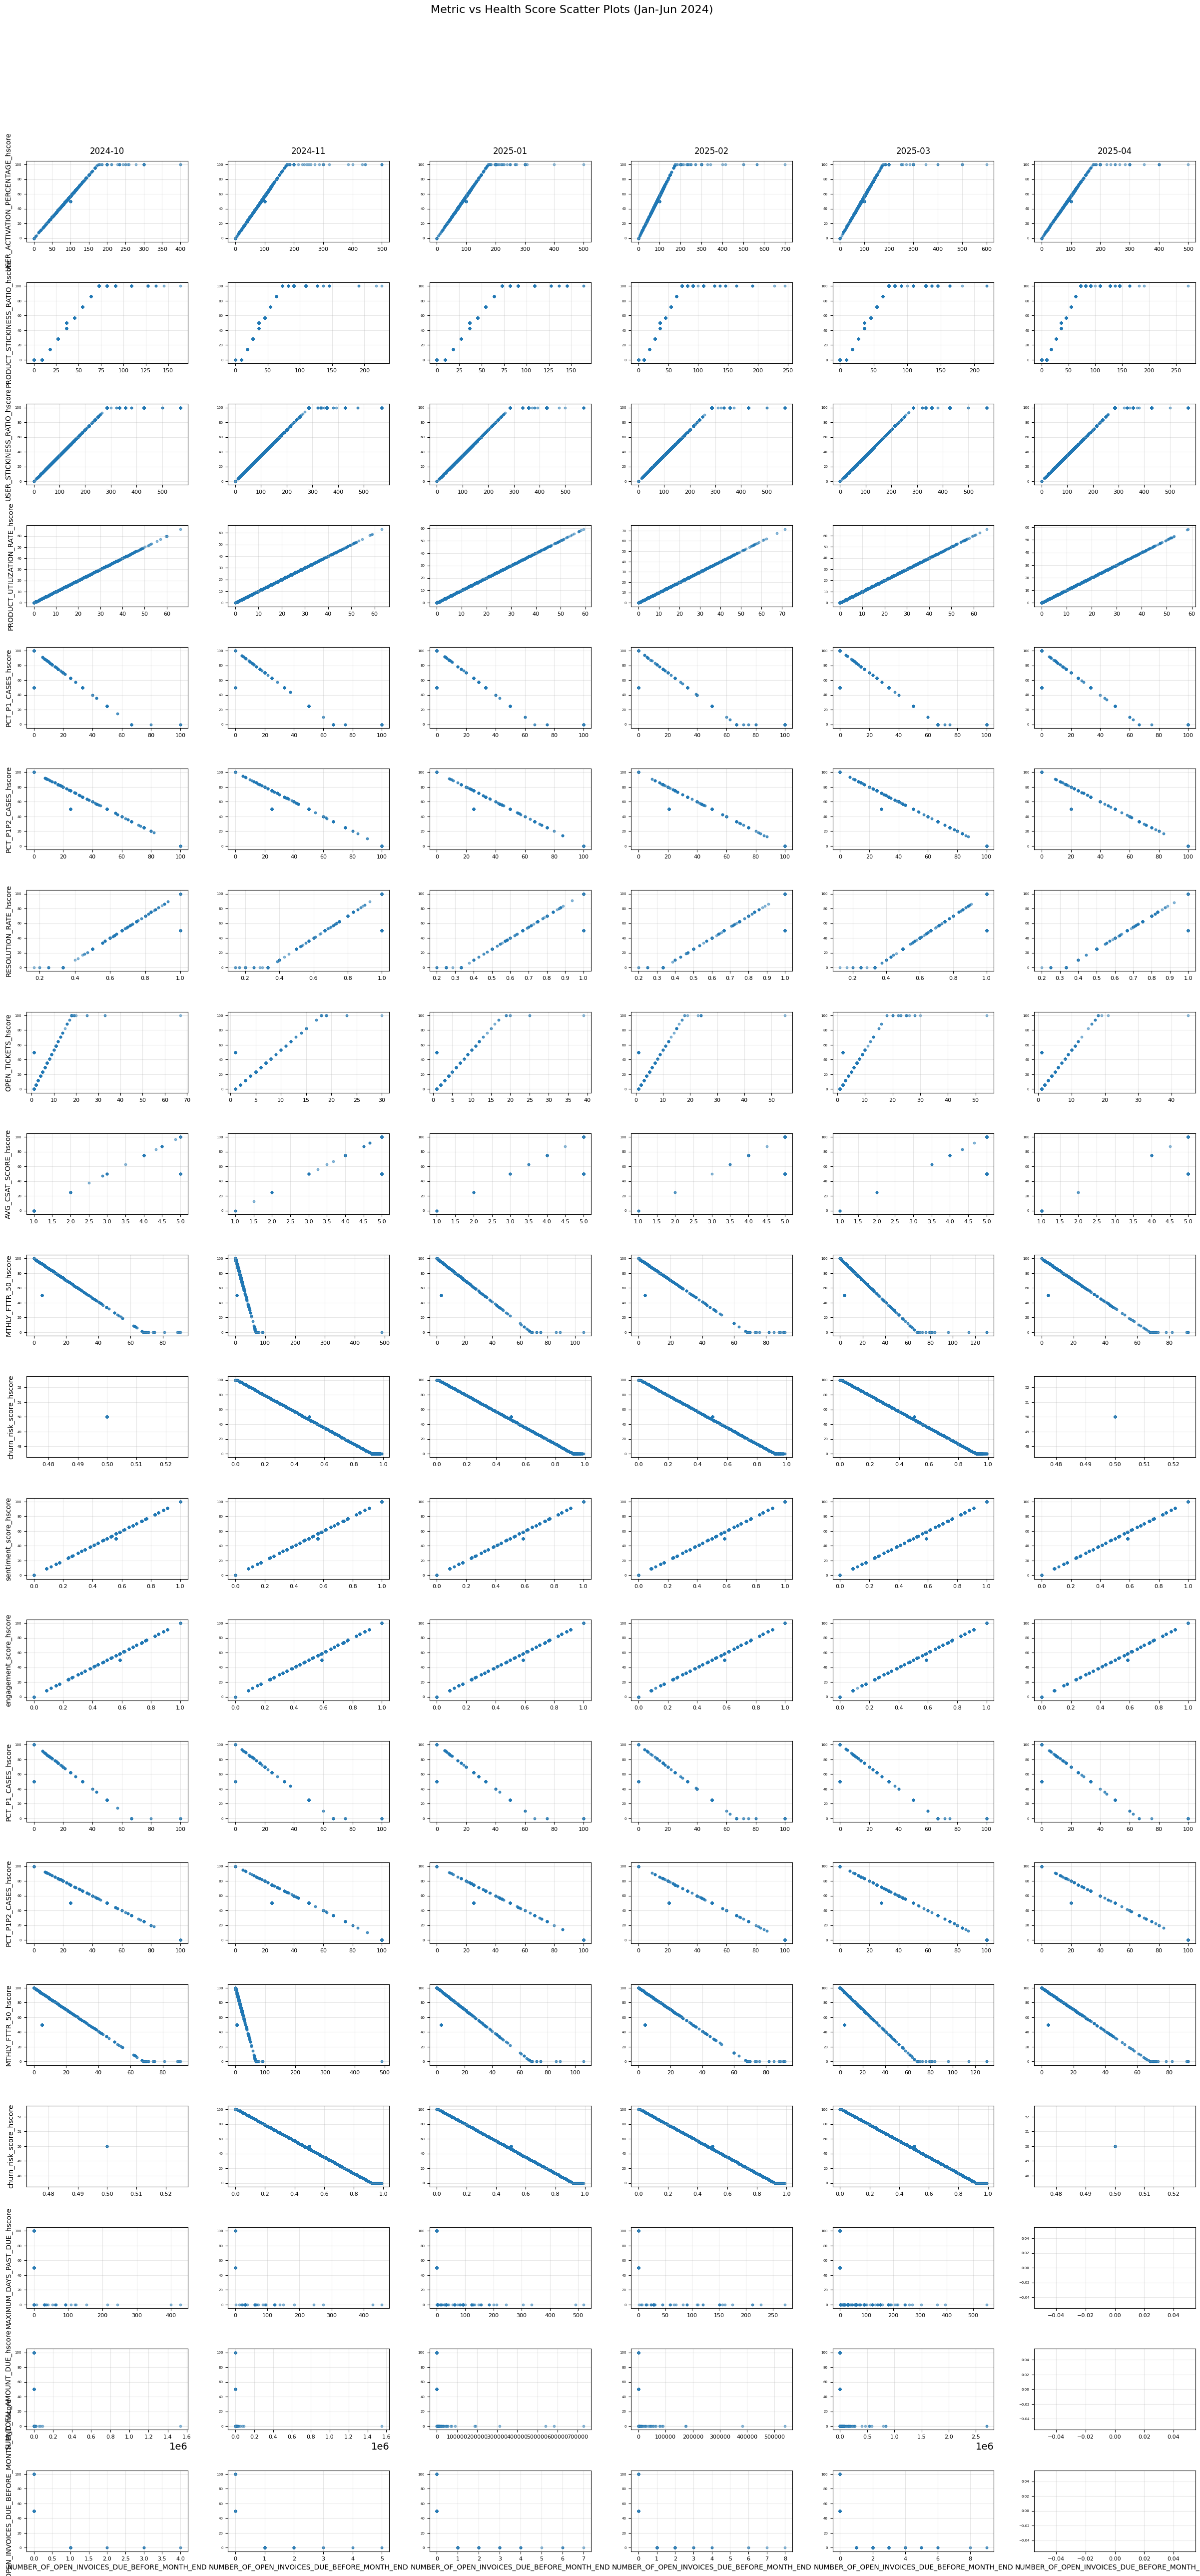

In [255]:
import matplotlib.pyplot as plt

# Define months and metrics
# months = ['2024-01-01', '2024-02-01', '2024-03-01', '2024-04-01', '2024-05-01', '2024-06-01']
months = ['2024-10-01', '2024-11-01', '2025-01-01', '2025-02-01', '2025-03-01', '2025-04-01']
metrics = [col for col in total_cols if not col.endswith('_hscore')]
hscore_cols = [f"{col}_hscore" for col in metrics]

# Prepare filtered DataFrames for each month and fillna for hscore columns
month_dfs = {}
for m in months:
    df_month = all_scores[all_scores['REPORT_MONTH'] == pd.to_datetime(m)].copy()
    for hcol in hscore_cols:
        if hcol in df_month.columns:
            df_month[hcol] = df_month[hcol].fillna(50)
    for col in metrics:
        if col=='churn_risk_score':
            # For churn risk score, fill NaN with 0
            df_month[col] = df_month[col].fillna(0.5)

        elif col in df_month.columns:
            median_val = df_month[col].median()
            df_month[col] = df_month[col].fillna(median_val)
    month_dfs[m] = df_month


# month_dfs['2024-02-01'].describe()

# Plot: for each metric, show scatter for each month in a row of subplots
n_metrics = len(total_cols)
n_months = len(months)
fig, axes = plt.subplots(n_metrics, n_months, figsize=(4 * n_months + 2, 2.5 * n_metrics + 2), squeeze=False)

for row, metric in enumerate(metrics):
    for col, m in enumerate(months):
        ax = axes[row, col]
        df_month = month_dfs[m]
        # Drop rows where either x or y is missing to ensure same length
        if metric in df_month.columns and f"{metric}_hscore" in df_month.columns:
            plot_df = df_month[[metric, f"{metric}_hscore"]].dropna()
            x = plot_df[metric]
            y = plot_df[f"{metric}_hscore"]
            ax.scatter(x, y, alpha=0.5, s=10)
        if row == 0:
            ax.set_title(f"{m[:7]}", fontsize=12, pad=10)
        if col == 0:
            ax.set_ylabel(f"{metric}_hscore", fontsize=10)
        else:
            ax.set_ylabel("")
        if row == n_metrics - 1:
            ax.set_xlabel(metric, fontsize=10)
        else:
            ax.set_xlabel("")
        ax.grid(True, alpha=0.3)
        ax.tick_params(axis='x', labelsize=8)
        ax.tick_params(axis='y', labelsize=5)

# Add a main title and adjust spacing
fig.suptitle("Metric vs Health Score Scatter Plots (Jan-Jun 2024)", fontsize=16, y=1.02)
plt.subplots_adjust(left=0.08, right=0.98, top=0.96, bottom=0.04, wspace=0.25, hspace=0.5)
plt.show()

In [223]:

df_feb = month_dfs['2024-02-01']
n_metrics = len(metrics)
# fig, axes = plt.subplots(n_metrics, 1, figsize=(7, 3 * n_metrics), constrained_layout=True)

for i, metric in enumerate(total_cols):
    hscore_col = f"{metric}_hscore"
    print(metric, hscore_col)
#     ax = axes[i]
#     if metric in df_feb.columns and hscore_col in df_feb.columns:
#         plot_df = df_feb[[metric, hscore_col]]
#         if not plot_df.empty:
#             ax.scatter(plot_df[metric], plot_df[hscore_col], alpha=0.6, s=10)
#             ax.set_xlabel(metric)
#             ax.set_ylabel(hscore_col)
#             ax.set_title(f"{metric} vs {hscore_col} (2024-02-01)")
#             ax.grid(True, alpha=0.3)
#         else:
#             ax.set_visible(False)
#     else:
#         ax.set_visible(False)

# plt.show()






USER_ACTIVATION_PERCENTAGE USER_ACTIVATION_PERCENTAGE_hscore
PRODUCT_STICKINESS_RATIO PRODUCT_STICKINESS_RATIO_hscore
USER_STICKINESS_RATIO USER_STICKINESS_RATIO_hscore
PRODUCT_UTILIZATION_RATE PRODUCT_UTILIZATION_RATE_hscore
PCT_P1_CASES PCT_P1_CASES_hscore
PCT_P1P2_CASES PCT_P1P2_CASES_hscore
RESOLUTION_RATE RESOLUTION_RATE_hscore
OPEN_TICKETS OPEN_TICKETS_hscore
AVG_CSAT_SCORE AVG_CSAT_SCORE_hscore
MTHLY_FTTR_50 MTHLY_FTTR_50_hscore
churn_risk_score churn_risk_score_hscore
sentiment_score sentiment_score_hscore
engagement_score engagement_score_hscore
PCT_P1_CASES PCT_P1_CASES_hscore
PCT_P1P2_CASES PCT_P1P2_CASES_hscore
MTHLY_FTTR_50 MTHLY_FTTR_50_hscore
churn_risk_score churn_risk_score_hscore
MAXIMUM_DAYS_PAST_DUE MAXIMUM_DAYS_PAST_DUE_hscore
SUM_TOTAL_AMOUNT_DUE SUM_TOTAL_AMOUNT_DUE_hscore
NUMBER_OF_OPEN_INVOICES_DUE_BEFORE_MONTH_END NUMBER_OF_OPEN_INVOICES_DUE_BEFORE_MONTH_END_hscore


In [227]:
df_feb

,SFDC_ACCOUNT_NAME,REPORT_MONTH,TARGET_M_PLUS_6_BCM,USER_ACTIVATION_PERCENTAGE,PRODUCT_STICKINESS_RATIO,USER_STICKINESS_RATIO,PRODUCT_UTILIZATION_RATE,PCT_P1_CASES,PCT_P1P2_CASES,RESOLUTION_RATE,OPEN_TICKETS,AVG_CSAT_SCORE,MTHLY_FTTR_50,churn_risk_score,sentiment_score,engagement_score,PCT_P1_CASES,PCT_P1P2_CASES,MTHLY_FTTR_50,churn_risk_score,MAXIMUM_DAYS_PAST_DUE,SUM_TOTAL_AMOUNT_DUE,NUMBER_OF_OPEN_INVOICES_DUE_BEFORE_MONTH_END,USER_ACTIVATION_PERCENTAGE_hscore,PRODUCT_STICKINESS_RATIO_hscore,USER_STICKINESS_RATIO_hscore,PRODUCT_UTILIZATION_RATE_hscore,PCT_P1_CASES_hscore,PCT_P1P2_CASES_hscore,RESOLUTION_RATE_hscore,OPEN_TICKETS_hscore,AVG_CSAT_SCORE_hscore,MTHLY_FTTR_50_hscore,churn_risk_score_hscore,sentiment_score_hscore,engagement_score_hscore
443824,Trim Healthy Mama,2024-02-01,414.845811,33.3333,27.2727,0.0000,0.000,0.0,0.0,1.0,1.0,5.0,3.5,0.5,0.5,0.5,0.0,0.0,3.5,0.5,0.0,0.0,0.0,0.000000,24.999931,0.000000,0.000000,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0
382495,BananaDesk,2024-02-01,21.680111,100.0000,36.3636,89.2500,5.712,0.0,0.0,1.0,1.0,5.0,3.5,0.5,0.5,0.5,0.0,0.0,3.5,0.5,0.0,0.0,0.0,72.973004,49.999863,62.476287,13.345794,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0
282776,"Rayyan Systems, Inc.",2024-02-01,1273.273621,100.0000,36.3636,102.0000,4.000,0.0,0.0,1.0,1.0,5.0,3.5,0.5,0.5,0.5,0.0,0.0,3.5,0.5,0.0,0.0,0.0,50.000000,49.999863,71.401471,9.345794,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0
444363,AlMasry AlYoum_2,2024-02-01,25.000000,100.0000,18.1818,0.0000,0.000,0.0,0.0,1.0,1.0,5.0,3.5,0.5,0.5,0.5,0.0,0.0,3.5,0.5,0.0,0.0,0.0,50.000000,0.000000,0.000000,0.000000,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0
421362,RiskLens,2024-02-01,100.508489,100.0000,54.5455,0.0000,0.000,0.0,0.0,1.0,1.0,5.0,3.5,0.5,0.5,0.5,0.0,0.0,3.5,0.5,0.0,0.0,0.0,72.973004,100.000000,0.000000,0.000000,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33800,Belly Inc.,2024-02-01,0.000000,0.0000,18.1818,0.0000,0.000,0.0,0.0,1.0,1.0,5.0,3.5,0.5,0.5,0.5,0.0,0.0,3.5,0.5,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0
2320,Unisport.dk,2024-02-01,312.497965,100.0000,36.3636,0.0000,0.000,0.0,0.0,1.0,1.0,5.0,3.5,0.5,0.5,0.5,0.0,0.0,3.5,0.5,0.0,0.0,0.0,50.000000,49.999863,0.000000,0.000000,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0
183633,RadarFit,2024-02-01,0.000000,100.0000,27.2727,0.0000,0.000,0.0,0.0,1.0,1.0,5.0,3.5,0.5,0.5,0.5,0.0,0.0,3.5,0.5,0.0,0.0,0.0,72.973004,24.999931,0.000000,0.000000,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0
182955,"Ingenious Med, Inc.",2024-02-01,5262.107600,87.5000,45.4545,54.9231,6.284,0.0,0.0,1.0,1.0,5.0,3.5,0.5,0.5,0.5,0.0,0.0,3.5,0.5,0.0,0.0,0.0,37.500035,74.999794,38.446962,14.682243,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0


In [226]:
df_feb[['MAXIMUM_DAYS_PAST_DUE', 'MAXIMUM_DAYS_PAST_DUE_hscore']]
df_feb[['USER_ACTIVATION_PERCENTAGE', 'PRODUCT_STICKINESS_RATIO', 'USER_STICKINESS_RATIO', 'PRODUCT_UTILIZATION_RATE', 'PCT_P1_CASES', 'PCT_P1P2_CASES', 'RESOLUTION_RATE', 'OPEN_TICKETS', 'AVG_CSAT_SCORE', 'MTHLY_FTTR_50', 'churn_risk_score', 'sentiment_score', 'engagement_score', 'MAXIMUM_DAYS_PAST_DUE', 'SUM_TOTAL_AMOUNT_DUE', 'NUMBER_OF_OPEN_INVOICES_DUE_BEFORE_MONTH_END']]

KeyError: "['MAXIMUM_DAYS_PAST_DUE_hscore'] not in index"

In [209]:
import matplotlib.pyplot as plt

def plot_metric_vs_hscore(df, metric, month, month_col='REPORT_MONTH'):
    """
    Plots the raw metric vs its health score for a given month.

    Parameters:
        df (pd.DataFrame): DataFrame containing the data.
        metric (str): The metric column name (raw).
        month (str): The month to filter on (format: 'YYYY-MM-DD').
        month_col (str): Column name for month (default: 'REPORT_MONTH').
    """
    hscore_col = f"{metric}_hscore"
    # Filter for the given month
    df_month = df[df[month_col] == month].copy()
    # Drop rows where either metric or hscore is missing
    plot_df = df_month[[metric, hscore_col]].dropna()
    if plot_df.empty:
        print(f"No data to plot for {metric} in {month}")
        return
    plt.figure(figsize=(6, 4))
    plt.scatter(plot_df[metric], plot_df[hscore_col], alpha=0.6, s=20)
    plt.xlabel(metric)
    plt.ylabel(hscore_col)
    plt.title(f"{metric} vs {hscore_col} for {month}")
    plt.grid(True, alpha=0.3)
    plt.show()

In [212]:
plot_metric_vs_hscore(all_scores, 'MAXIMUM_DAYS_PAST_DUE', '2024-01-01')

KeyError: "['MAXIMUM_DAYS_PAST_DUE_hscore'] not in index"

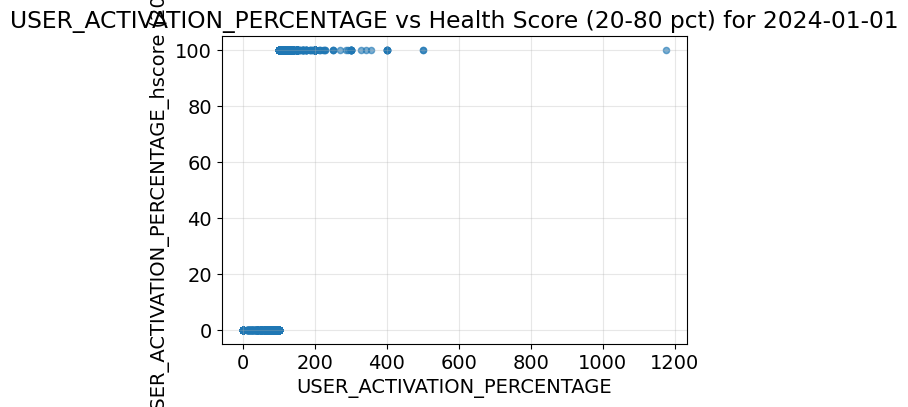

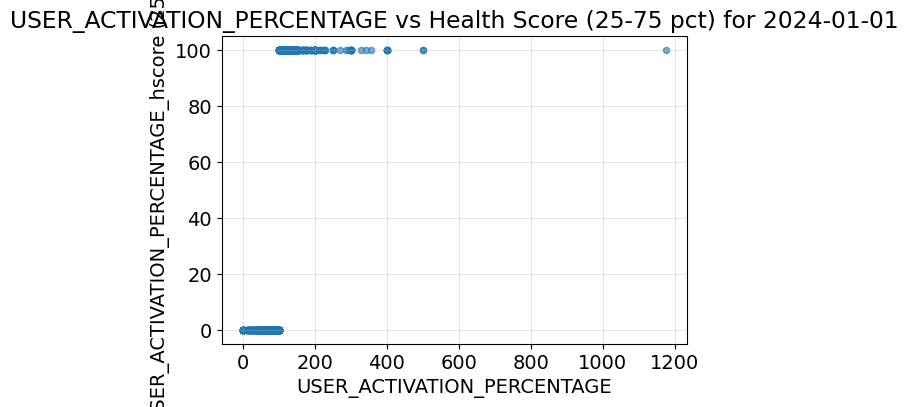

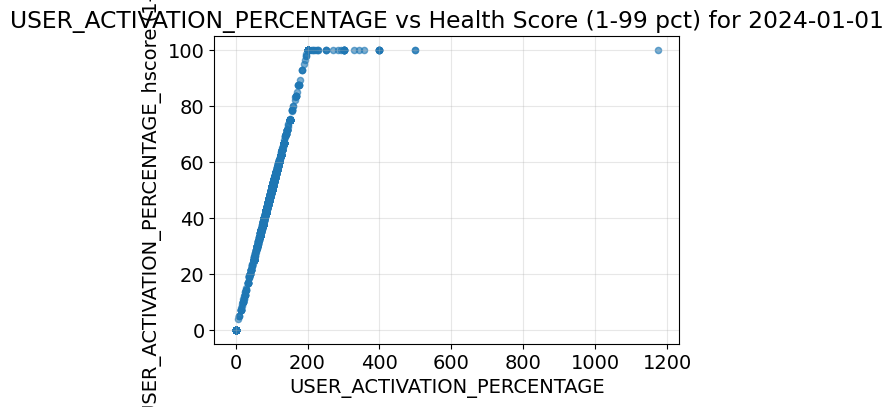

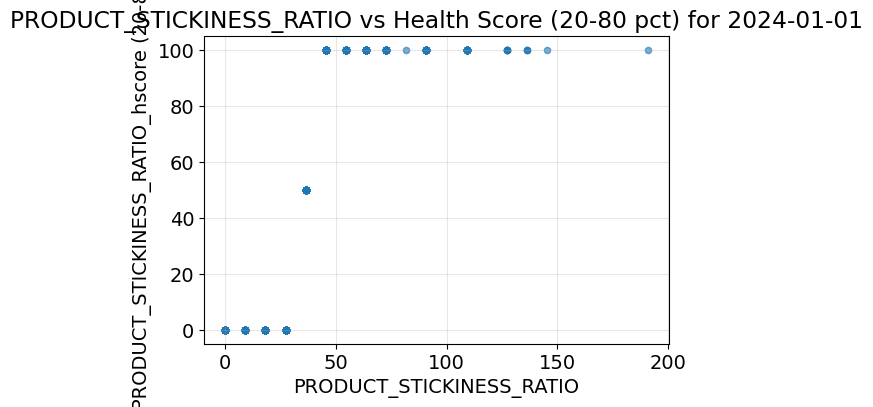

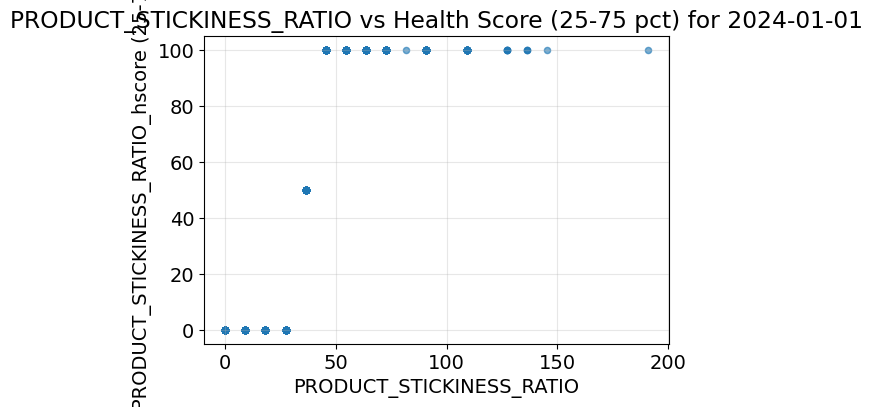

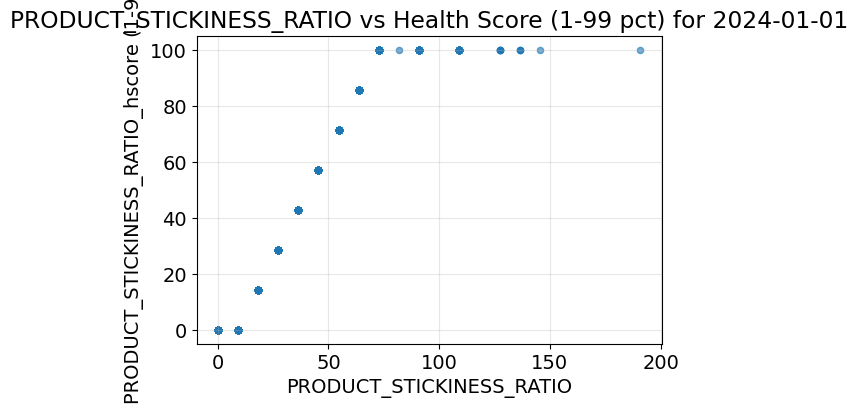

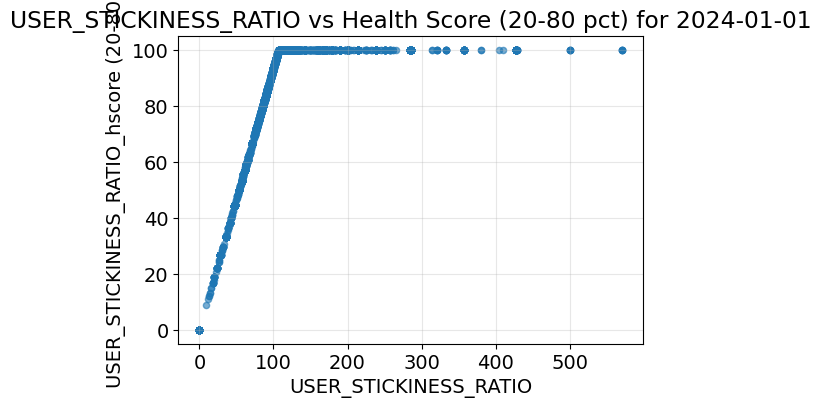

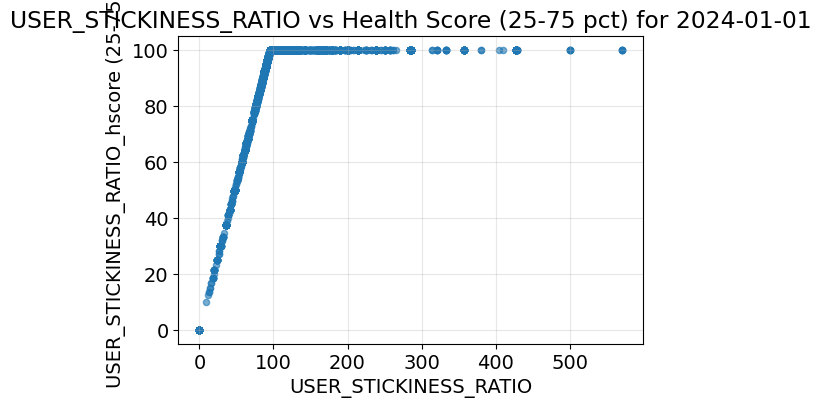

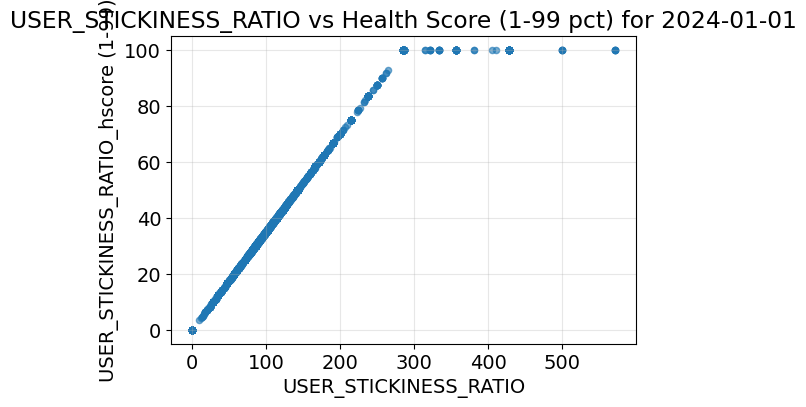

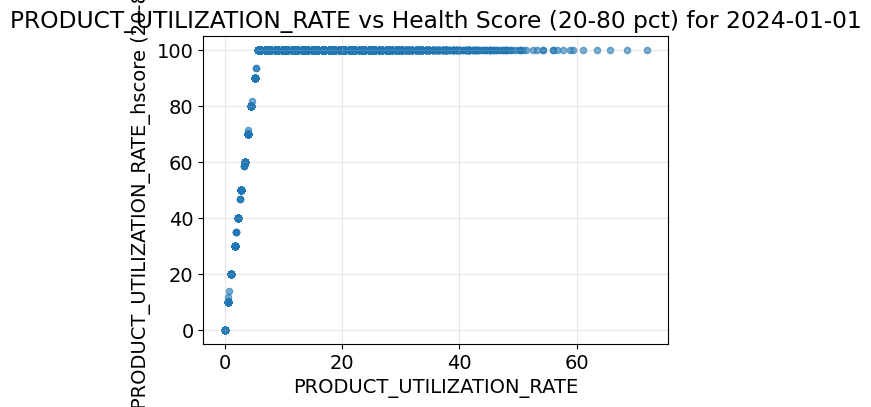

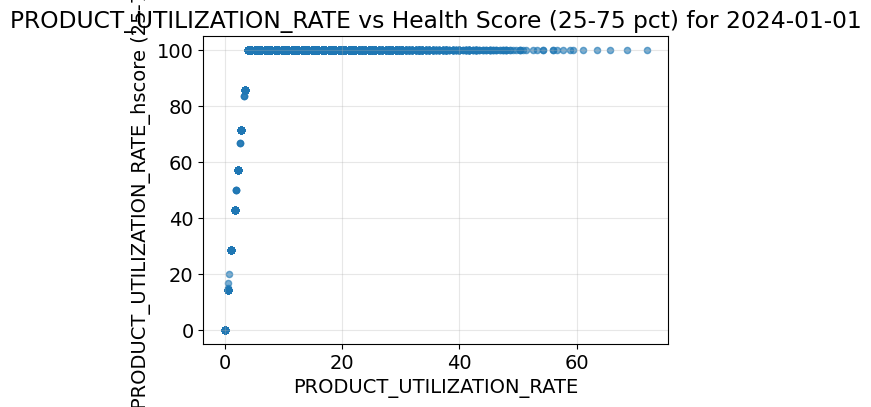

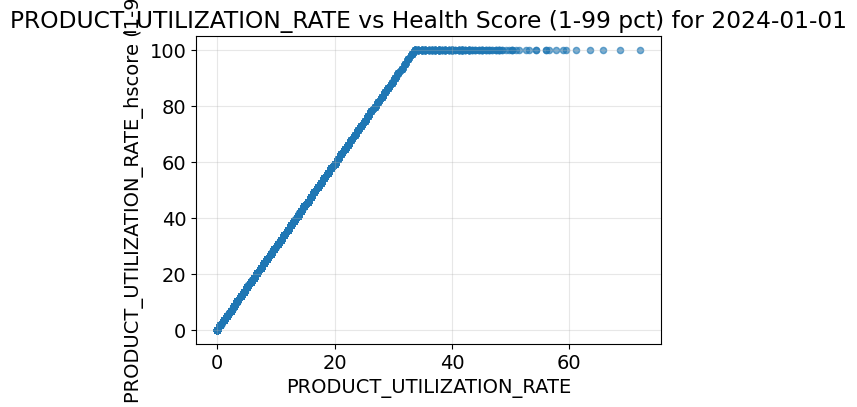

KeyError: "[('P', 'C', 'T', '_', 'P', '1', '_', 'C', 'A', 'S', 'E', 'S')\n ('P', 'C', 'T', '_', 'P', '1', '_', 'C', 'A', 'S', 'E', 'S')] not in index"

In [241]:
import matplotlib.pyplot as plt

def plot_metric_vs_hscore_cutoffs(df, metric, month, p_low, p_high, month_col='REPORT_MONTH'):
    """
    Plots the raw metric vs its health score for a given month, using custom percentiles for normalization.

    Parameters:
        df (pd.DataFrame): DataFrame containing the data.
        metric (str): The metric column name (raw).
        month (str): The month to filter on (format: 'YYYY-MM-DD').
        p_low (float): Lower percentile (e.g., 0.20 for 20th percentile).
        p_high (float): Upper percentile (e.g., 0.80 for 80th percentile).
        month_col (str): Column name for month (default: 'REPORT_MONTH').
    """
    hscore_col = f"{metric}_hscore"
    df_month = df[df[month_col] == month].copy()
    raw = df_month[metric]
    p_lo = raw.dropna().quantile(p_low)
    p_hi = raw.dropna().quantile(p_high)
    norm = pd.Series(index=raw.index, dtype=float)
    # Use descending_cols from earlier context
    if metric in descending_cols:
        norm[raw >= p_hi] = 0
        norm[raw <= p_lo] = 100
        mask = (raw > p_lo) & (raw < p_hi)
        norm[mask] = 100 * (p_hi - raw[mask]) / (p_hi - p_lo)
    else:
        norm[raw >= p_hi] = 100
        norm[raw <= p_lo] = 0
        mask = (raw > p_lo) & (raw < p_hi)
        norm[mask] = 100 * (raw[mask] - p_lo) / (p_hi - p_lo)
    plot_df = df_month[[metric]].copy()
    plot_df['custom_hscore'] = norm
    plot_df = plot_df.dropna()
    if plot_df.empty:
        print(f"No data to plot for {metric} in {month} (cutoffs {int(p_low*100)}-{int(p_high*100)})")
        return
    plt.figure(figsize=(6, 4))
    plt.scatter(plot_df[metric], plot_df['custom_hscore'], alpha=0.6, s=20)
    plt.xlabel(metric)
    plt.ylabel(f"{metric}_hscore ({int(p_low*100)}-{int(p_high*100)})")
    plt.title(f"{metric} vs Health Score ({int(p_low*100)}-{int(p_high*100)} pct) for {month}")
    plt.grid(True, alpha=0.3)
    plt.show()

# Example usage for p20/p80 and p25/p75 cutoffs

for date in ['2024-01-01', '2024-02-01', '2024-03-01', '2024-04-01', '2024-05-01', '2024-06-01']:
    for metric in total_cols:
        plot_metric_vs_hscore_cutoffs(all_scores, metric, date, 0.20, 0.80)
        plot_metric_vs_hscore_cutoffs(all_scores, metric, date, 0.25, 0.75)
        plot_metric_vs_hscore_cutoffs(all_scores, metric, date, 0.01, 0.99)


